In [1]:
##IMPORTING LIABRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load the dataset
customers= pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [2]:
customers['SignupDate']= pd.to_datetime(customers['SignupDate'],errors='coerce')

In [3]:
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'],errors='coerce')

In [4]:
#Merge Datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")


In [5]:
print("\nSummary Statistics for Numeric Columns:\n", merged_data.describe())
print("\nUnique Value Counts for Categorical Columns:\n", merged_data.select_dtypes(include='object').nunique())



Summary Statistics for Numeric Columns:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  


<ipython-input-6-665a78b3d755>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="TotalValue", y="Category", palette="viridis")


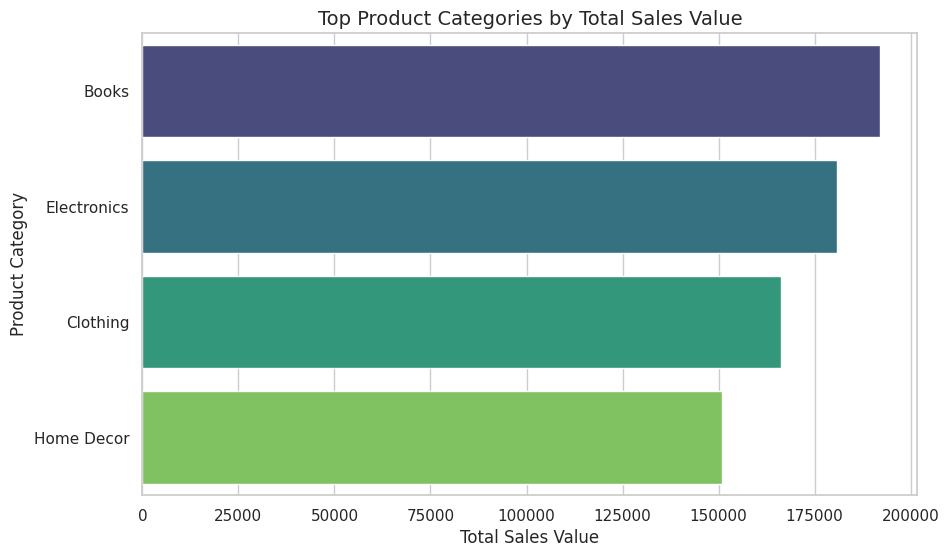

In [6]:
##TOP PERFORMING PRODUCT CATEGORIES BY TOTAL SALES VALUE


category_sales = (
    merged_data.groupby("Category")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
sns.set(style="whitegrid")
# Top product categories by sales
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x="TotalValue", y="Category", palette="viridis")
plt.title("Top Product Categories by Total Sales Value", fontsize=14)
plt.xlabel("Total Sales Value")
plt.ylabel("Product Category")
plt.show()


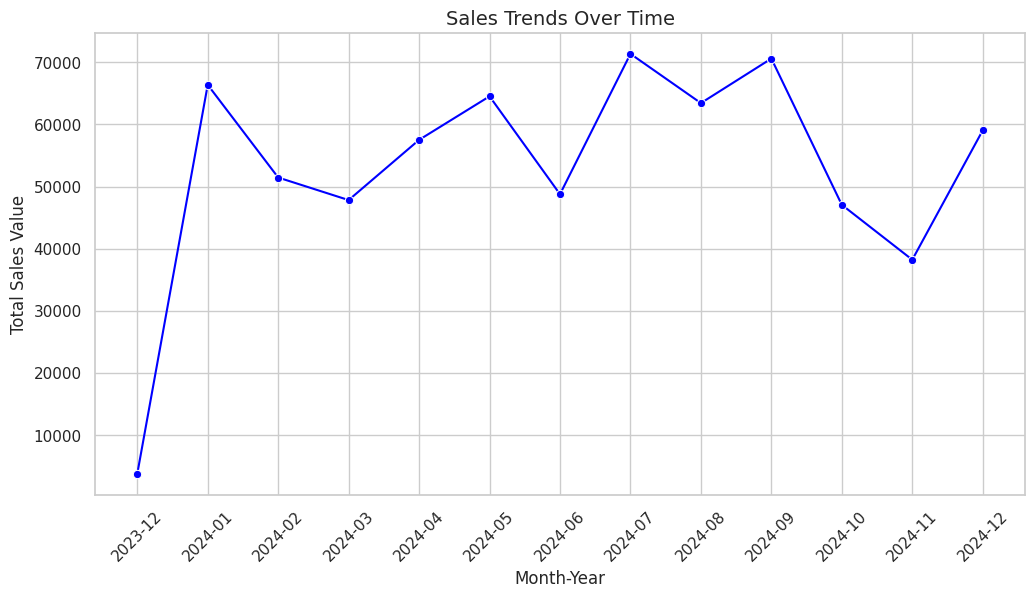

In [7]:
#SALES TREND OVER TIME [MONTHLY]
import warnings
warnings.filterwarnings('ignore')

# Ensure TotalValue is numeric
merged_data['TotalValue'] = pd.to_numeric(merged_data['TotalValue'], errors='coerce')

# Drop rows with NaN TotalValue
merged_data = merged_data.dropna(subset=['TotalValue'])

# Group data by MonthYear and calculate total sales
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby("MonthYear")["TotalValue"].sum().reset_index()

# Convert MonthYear to string for plotting
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

# Plot Sales Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="MonthYear", y="TotalValue", marker="o", color="blue")
plt.title("Sales Trends Over Time", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()


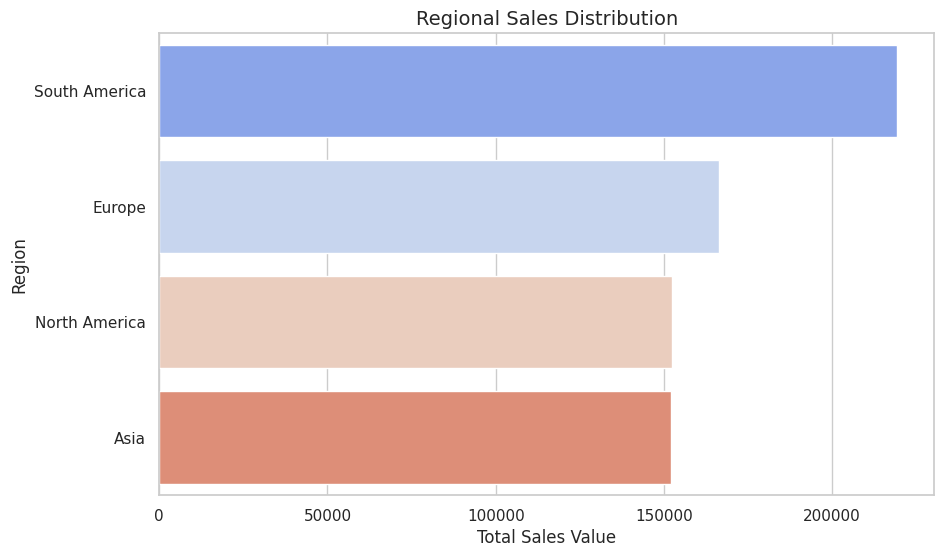

In [8]:
##REGIONAL SALES DISTRIBUTIONS

regional_sales = (
    merged_data.groupby("Region")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index())
# Regional sales distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_sales, x="TotalValue", y="Region", palette="coolwarm")
plt.title("Regional Sales Distribution", fontsize=14)
plt.xlabel("Total Sales Value")
plt.ylabel("Region")
plt.show()

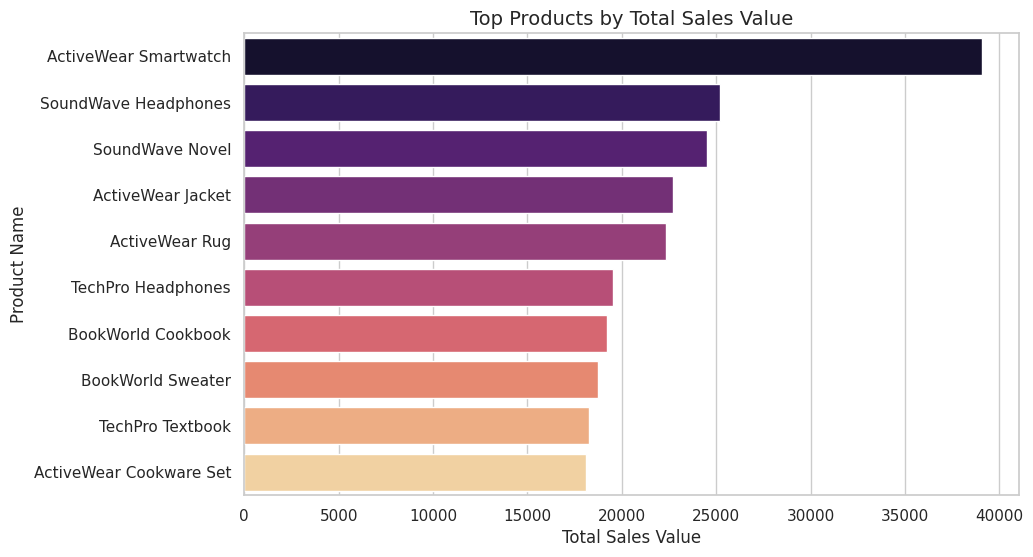

In [9]:
##TOP PRODUCTS BY TOTAL SALES
top_products = (
    merged_data.groupby("ProductName")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
# Top products by sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="TotalValue", y="ProductName", palette="magma")
plt.title("Top Products by Total Sales Value", fontsize=14)
plt.xlabel("Total Sales Value")
plt.ylabel("Product Name")
plt.show()


# New Section